In [1]:
import cv2
import os
import numpy as np
from glob import glob
import PIL.Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataDirsPath = '/Users/jerryhui/Desktop/Files/UGA/CS/8360DataPracticum/Projects/p2/project2/data/data/*'
dataDirs = glob(dataDirsPath)

maskDirPath = '/Users/jerryhui/Desktop/Files/UGA/CS/8360DataPracticum/Projects/p2/project2/masks'

In [18]:
hashcodeFilePath = '/Users/jerryhui/Desktop/Files/UGA/CS/8360DataPracticum/Projects/p2/project2/train.txt'
hashcodeSet = set()
with open(hashcodeFilePath, 'r') as f:
    for line in f:
        hashcodeSet.add(line.strip())

/Users/jerryhui/miniconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


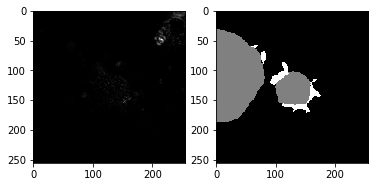

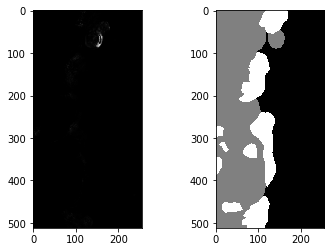

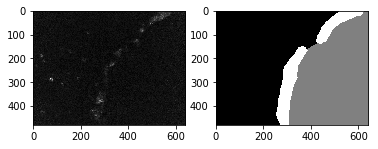

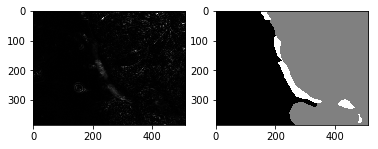

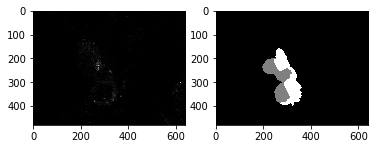

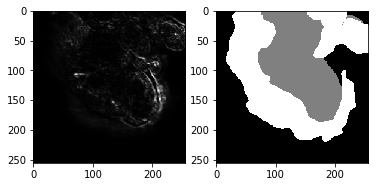

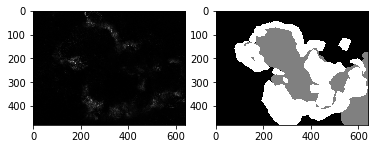

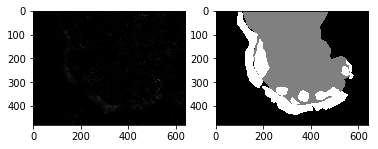

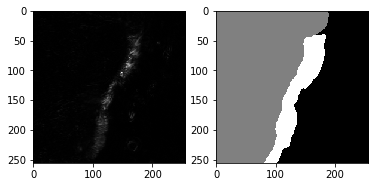

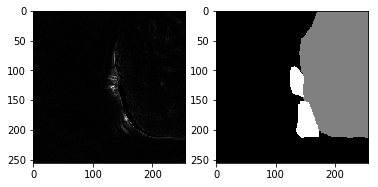

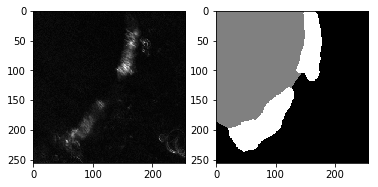

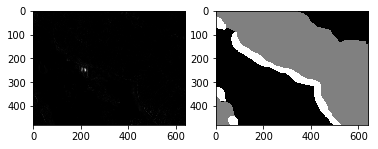

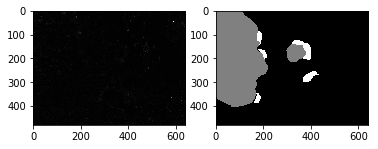

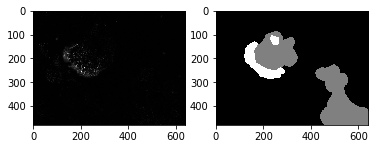

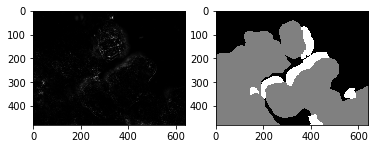

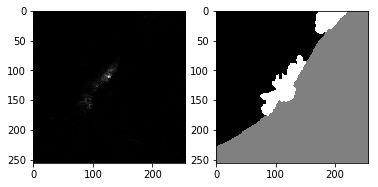

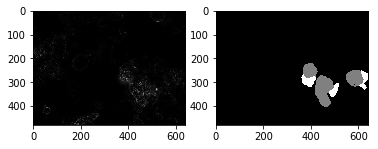

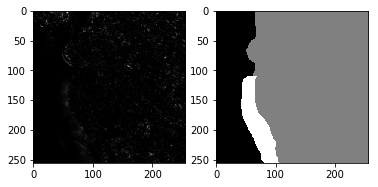

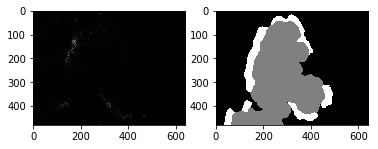

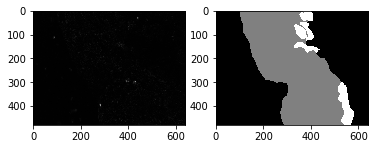

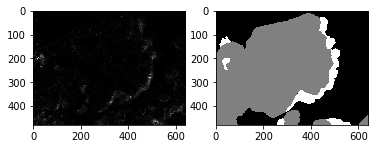

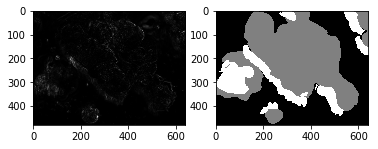

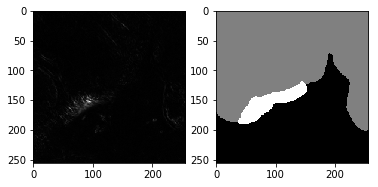

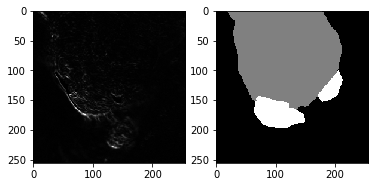

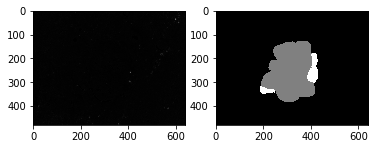

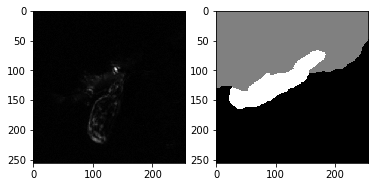

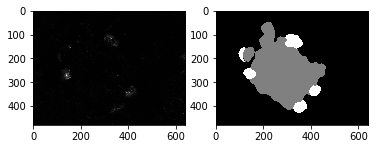

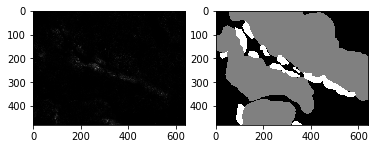

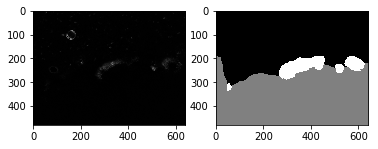

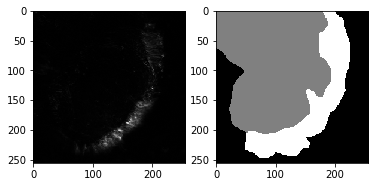

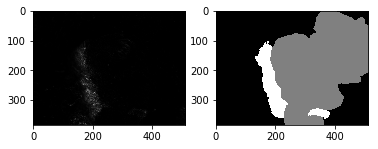

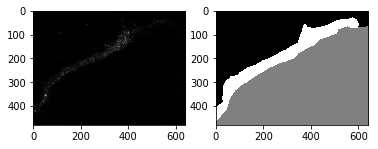

In [30]:
cnt = 0
for direc in dataDirs:
#     print(direc)
    hashcode = direc.split('/')[-1]
#     print(hashcode)
    if hashcode not in hashcodeSet:
        continue
        
    maskPath = os.path.join(maskDirPath, hashcode + '.png')
    frame0 = cv2.imread(os.path.join(direc, 'frame0000.png'), 0)
    row, col = frame0.shape
    
    data = np.zeros((100, row, col))
    for i in range(100):
        frame = cv2.imread(os.path.join(direc, 'frame0' + str(i).zfill(3) + '.png'), 0)
        data[i,:,:] = frame
    data1 = np.var(data, axis=0)
#     print(data.shape)
#     print(data1.shape)
#     print(np.max(data1))
#     print(np.min(data1))
#     data1 = data1 / np.max(data1) * 256
    
    mask = cv2.imread(maskPath, 0)
#     print(mask.shape)
#     print(mask)
    
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(data1, cmap='gray')
    axarr[1].imshow(mask, cmap='gray')
#     plt.imshow(data1, cmap='gray')
#     plt.imshow(mask, cmap='gray')
    
    if cnt > 30:
        break
    cnt += 1

In [103]:
varLabel = [[] for _ in range(3)]

cnt = 0
for direc in dataDirs:
    hashcode = direc.split('/')[-1]
    if hashcode not in hashcodeSet:
        continue
        
    maskPath = os.path.join(maskDirPath, hashcode + '.png')
    frame0 = cv2.imread(os.path.join(direc, 'frame0000.png'), 0)
    row, col = frame0.shape
    
    data = np.zeros((100, row, col))
    for i in range(100):
        frame = cv2.imread(os.path.join(direc, 'frame0' + str(i).zfill(3) + '.png'), 0)
        data[i,:,:] = frame
    data1 = np.var(data, axis=0)
    
    mean = np.mean(data1)
    std = np.std(data1)
    
    print(mean, std, np.max(data1), np.min(data1))
    
#     data1 = (data1 - mean) / std
    data1 = data1 / np.max(data1) * 256
    
    mask = cv2.imread(maskPath, 0)
#     print(row, col)
    for i in range(row):
        for j in range(col):
            if mask[i][j] == 0:
                varLabel[0].append(data1[i][j])
            elif mask[i][j] == 1:
                varLabel[1].append(data1[i][j])
            else:
                varLabel[2].append(data1[i][j])
#             varLabel.append([data1[i][j], mask[i][j]])
    
    if cnt >= 2:
        break
    cnt += 1


4.676955354309082 20.022162540860165 795.9475 0.0
10.987600791931152 89.96737098296173 4327.457899999998 0.0
1.1210994130859377 0.5218145219309208 14.580000000000002 0.14559999999999995


In [72]:
# varLabelNP = np.array(varLabel)
# print(varLabelNP.shape)
print(len(varLabel[0]), len(varLabel[1]), len(varLabel[2]))

277457 179605 46746


In [59]:
plt.scatter(varLabelNP[:,1], varLabelNP[:,0])
plt.show()

IndexError: too many indices for array

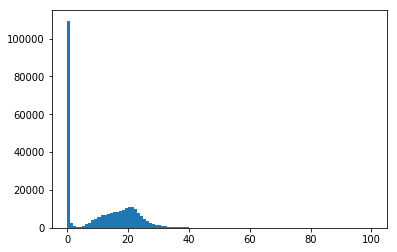

In [104]:
plt.hist(varLabel[0], bins=100, range=(0,100))
plt.show()

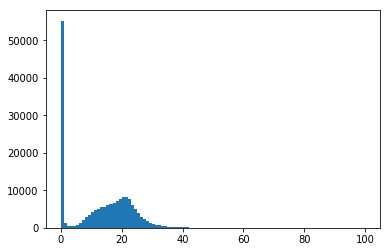

In [105]:
plt.hist(varLabel[1], bins=100, range=(0,100))
plt.show()

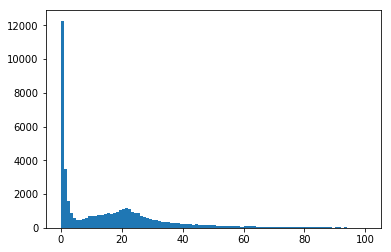

In [106]:
plt.hist(varLabel[2], bins=100, range=(0,100))
plt.show()

In [109]:
trainData = []

cnt = 1
for direc in dataDirs:
    hashcode = direc.split('/')[-1]
    if hashcode not in hashcodeSet:
        continue
        
    maskPath = os.path.join(maskDirPath, hashcode + '.png')
    frame0 = cv2.imread(os.path.join(direc, 'frame0000.png'), 0)
    row, col = frame0.shape
    
    data = np.zeros((100, row, col))
    for i in range(100):
        frame = cv2.imread(os.path.join(direc, 'frame0' + str(i).zfill(3) + '.png'), 0)
        data[i,:,:] = frame
    data1 = np.var(data, axis=0)
    
#     mean = np.mean(data1)
#     std = np.std(data1)
#     data1 = (data1 - mean) / std
    data1 = data1 / np.max(data1) * 256
    
    mask = cv2.imread(maskPath, 0)
#     print(row, col)
    for i in range(row):
        for j in range(col):
            trainData.append([data1[i][j], mask[i][j]])
    
    if cnt >= 10:
        break
    cnt += 1


In [121]:
print(trainData[:10])

[[0.3558506057246244, 0], [0.13106392067315972, 0], [0.3901684470395338, 0], [0.45555567421218185, 0], [0.35054372304706094, 0], [0.16322684599172668, 0], [0.2409324735613847, 0], [0.1472740350337175, 0], [0.20404159822098783, 0], [0.3425673175680548, 0]]


In [112]:
def getIOU(trainData, cur):
    intersection, union = 0, 0
    for fea, label in trainData:
        if label == 2 or fea >= cur:
            union += 1
        if label == 2 and fea >= cur:
            intersection += 1
    return intersection * 1.0 / union

In [125]:
cur = 2
step = 1
curIOU = getIOU(trainData, cur)
preIOU = 0

while abs(curIOU - preIOU) >= 1e-6:
    preIOU = curIOU
    cur += step
    curIOU = getIOU(trainData, cur)
    print('%f, %f, %f, %f' % (curIOU, preIOU, cur, step))
    if curIOU < preIOU:
        step = step * (-0.2)

0.204826, 0.205908, 3.000000, 1.000000
0.205325, 0.204826, 2.800000, -0.200000
0.205733, 0.205325, 2.600000, -0.200000
0.205998, 0.205733, 2.400000, -0.200000
0.206172, 0.205998, 2.200000, -0.200000
0.205908, 0.206172, 2.000000, -0.200000
0.206037, 0.205908, 2.040000, 0.040000
0.206111, 0.206037, 2.080000, 0.040000
0.206133, 0.206111, 2.120000, 0.040000
0.206190, 0.206133, 2.160000, 0.040000
0.206172, 0.206190, 2.200000, 0.040000
0.206181, 0.206172, 2.192000, -0.008000
0.206174, 0.206181, 2.184000, -0.008000
0.206188, 0.206174, 2.185600, 0.001600
0.206190, 0.206188, 2.187200, 0.001600
0.206193, 0.206190, 2.188800, 0.001600
0.206190, 0.206193, 2.190400, 0.001600
0.206191, 0.206190, 2.190080, -0.000320


In [116]:
print(curIOU)
print(cur)

0.12647804054054054
10


In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
clf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

In [89]:
clf.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [91]:
print(len(xTrain))
print(len(yTrain))

1818624
1818624


In [92]:
print(np.array(xTrain).shape)

(1818624, 2)


In [99]:
clf.predict([[10, 10]])

array([1], dtype=uint8)